<a href="https://colab.research.google.com/github/men-ka/data-science-111/blob/main/day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = "https://raw.githubusercontent.com/sc0609/Netflix_Data/refs/heads/main/netflix_titles.csv"
df = pd.read_csv(url)

In [6]:
print("First 5 rows:")
print(df.head())

First 5 rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24

In [7]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [10]:
df['director']= df['director'].fillna("Unknown")
df['cast']= df['cast'].fillna("Unknown")
df['country']=df['country'].fillna("Unknown")

In [11]:
df.drop_duplicates(inplace=True)

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['year_added'] = df['date_added'].dt.year

In [17]:
print("Shows added per year:\n")
print(df['year_added'].value_counts().sort_index())

Shows added per year:

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64


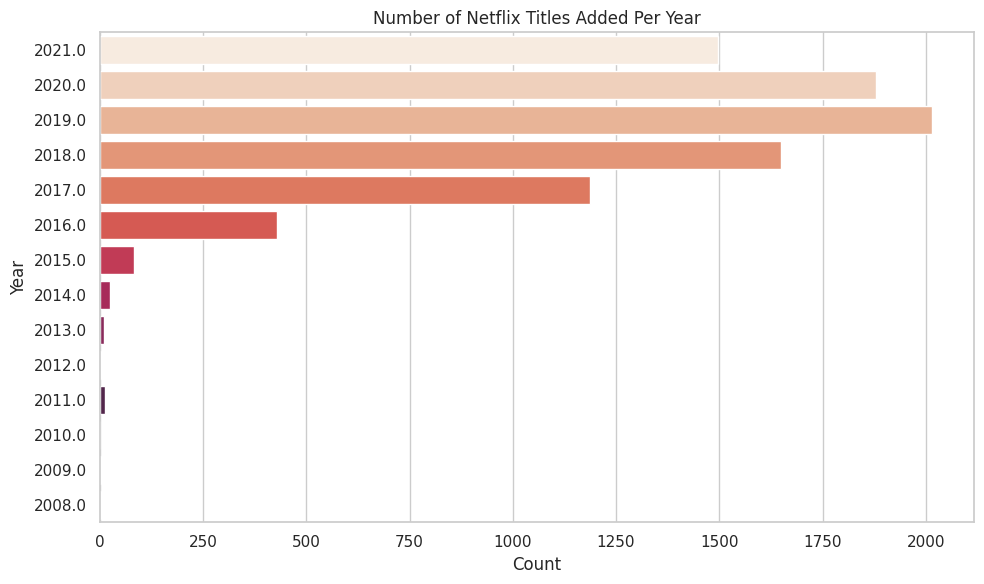

In [21]:
#plot style
sns.set(style="whitegrid")
#Create bar plot
plt.figure(figsize=(10,6))
sns.countplot(y='year_added', data=df, order=sorted(df['year_added'].dropna().unique(), reverse=True), palette='rocket', hue='year_added', legend=False)
plt.title('Number of Netflix Titles Added Per Year')
plt.xlabel('Count')
plt.ylabel('Year')
plt.tight_layout()
plt.show()